In [ ]:
# Create Kaggle directory
!mkdir -p ~/.kaggle

# Copy API key to Kaggle directory
!cp kaggle.json ~/.kaggle/

# Set secure permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download dataset for the 'dogs-vs-cats' Kaggle competition using Kaggle API
!kaggle competitions download -c dogs-vs-cats

In [ ]:
# Extracting the compressed dataset ('dogs-vs-cats.zip') using the ZipFile module
from zipfile import ZipFile

# Specify the path to the dataset zip file
dataset = '/Users/hedayahbokhari/dogs-vs-cats.zip'

# Open the zip file and extract its contents
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

In [ ]:
# Extracting the compressed dataset ('train.zip') using the ZipFile module
from zipfile import ZipFile

# Specify the path to the dataset zip file
dataset = '/Users/hedayahbokhari/train.zip'

# Open the zip file and extract its contents
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

In [85]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

In [21]:
# Counting the number of dog and cat images in the 'train' directory
import os

# Get the list of file names in the 'train' directory
file_names = os.listdir('/Users/hedayahbokhari/train')

# Initialize counters for dog and cat images
dog_count = 0
cat_count = 0

# Iterate through the file names
for img_file in file_names:
  
  # Extract the first three characters of the file name
  name = img_file[0:3]

  # Check if the image is a dog or a cat and update the respective counter
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

# Print the final counts of dog and cat images
print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [22]:
#creating a directory for resized images
os.mkdir('/Users/hedayahbokhari/image resized')

In [32]:
# Resize and convert images from the 'train' directory to 'image resized'
from PIL import Image
import os

# Specify the original and resized folders
original_folder = '/Users/hedayahbokhari/train/'
resized_folder = '/Users/hedayahbokhari/image resized/'

# Iterate through the first 2000 files in the original folder
for i in range(2000):

  # Get the filename and full path of the original image
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  # Open, resize, and convert the image to RGB
  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  # Define the path for the resized image
  newImgPath = resized_folder + filename

  # Save the resized image
  img.save(newImgPath)

Creating labels for resized images of dogs and cats

In [56]:
# Creating a for loop to assign labels based on file names
import os

# Get the list of file names in the 'image resized' folder
filenames = os.listdir('/Users/hedayahbokhari/image resized/')

# Initialize an empty list to store labels
labels = []

# Iterate through the first 2000 file names
for i in range(2000):

  # Extract the file name and its first three characters
  file_name = filenames[i]
  label = file_name[0:3]

  # Assign a label of 1 for 'dog' and 0 for 'cat'
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [55]:
# Print the first five labels and the total number of labels
print(labels[0:5])
print("Total number of labels:", len(labels))

[1, 0, 1, 0, 0]
2000


In [57]:
# Counting the number of dog and cat images out of 2000 images
import numpy as np

# Use NumPy to find unique labels and their counts
values, counts = np.unique(labels, return_counts=True)

# Print the unique labels and their corresponding counts
print("Unique labels:", values)
print("Counts:", counts)

[0 1]
[ 986 1014]


Converting all the resized images to numpy arrays

In [83]:
import cv2
import glob

In [60]:
image_directory = '/Users/hedayahbokhari/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [64]:
X = dog_cat_images
Y = np.asarray(labels)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [66]:
# Print the shapes of the original, training, and test datasets
print("Original Data Shape:", X.shape)
print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [67]:
# Scale the pixel values of the training and test data to a range of [0, 1]
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


Building the Neural Network

In [75]:
import tensorflow as tf
import tensorflow_hub as hub

In [76]:
# Define the MobileNet pre-trained model URL
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

# Create a KerasLayer using the specified MobileNet model and input shape
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [77]:
# Define the number of output classes
num_of_classes = 2

# Create a Sequential model with a pre-trained base model and a Dense layer
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

# Display a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [80]:
# Compile the model with specified optimizer, loss function, and metrics
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [91]:
# Train the model using the scaled training data for 15 epochs
model.fit(X_train_scaled, Y_train, epochs=15)

Epoch 1/15
50/50 [==============================] - 29s 420ms/step - loss: 0.2117 - acc: 0.9194
Epoch 2/15
50/50 [==============================] - 21s 421ms/step - loss: 0.0744 - acc: 0.9762
Epoch 3/15
50/50 [==============================] - 22s 439ms/step - loss: 0.0549 - acc: 0.9856
Epoch 4/15
50/50 [==============================] - 22s 445ms/step - loss: 0.0463 - acc: 0.9869
Epoch 5/15
50/50 [==============================] - 19s 375ms/step - loss: 0.0384 - acc: 0.9887
Epoch 6/15
50/50 [==============================] - 19s 378ms/step - loss: 0.0312 - acc: 0.9912
Epoch 7/15
50/50 [==============================] - 19s 379ms/step - loss: 0.0267 - acc: 0.9937
Epoch 8/15
50/50 [==============================] - 19s 380ms/step - loss: 0.0203 - acc: 0.9975
Epoch 9/15
50/50 [==============================] - 19s 380ms/step - loss: 0.0177 - acc: 0.9969
Epoch 10/15
50/50 [==============================] - 19s 389ms/step - loss: 0.0159 - acc: 0.9975
Epoch 11/15
50/50 [====================

In [92]:
# Evaluate the model on the test set
score, acc = model.evaluate(X_test_scaled, Y_test)

# Print the test loss and accuracy
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 5s 382ms/step - loss: 0.0479 - acc: 0.9825
Test Loss = 0.04792878031730652
Test Accuracy = 0.9825000166893005


### Predictive System

Path of the image to be predicted:  /Users/hedayahbokhari/Downloads/Cat.jpg


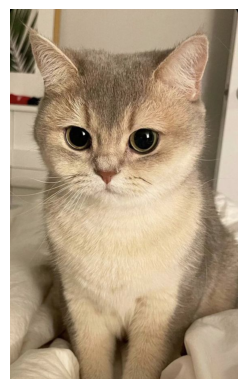

1/1 [==============================] - 0s 44ms/step
[[-0.3394509 -1.4135828]]
0
The image represents a Cat


In [87]:
# Import necessary libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Get the path of the image to be predicted from user input
input_image_path = input('Path of the image to be predicted: ')

# Read the input image using OpenCV
input_image = cv2.imread(input_image_path)

# Display the original image using matplotlib
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Resize and scale the input image
input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize / 255.0

# Reshape the image for model prediction
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Get the prediction from the loaded model
input_prediction = model.predict(image_reshaped)
print("Prediction scores:", input_prediction)

# Get the predicted label by finding the index of the maximum score
input_pred_label = np.argmax(input_prediction)
print("Predicted label:", input_pred_label)

# Display the predicted result based on the label
if input_pred_label == 0:
    print('The image represents a Cat')
else:
    print('The image represents a Dog')